# チュートリアル現実実験結果の描画
tutorial/realを実行した後に, ユーザーガイドにあるxy図をpythonで描くノートブックです.
SCALEの分割出力ファイルを読み込む部分はmod_scaleという解析ライブラリを利用すると簡単です.

## ライブラリの読込
* numpy: 数値計算ライブラリ
* xarray: 
* matplotlib: 描画ライブラリ
* mod_scale.g_file: SCALE解析ライブラリ(ファイル関係). 現在いるディレクトリにリンクを貼っておく必要がある. (e.g., ln -s /home/hoge/mod_scale ./)

In [1]:
# Import libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mod_scale.g_file import get_xrvar, get_fpathlist
import os
plt.rcParams["font.size"]=15

## データ情報の設定
* dir1,dir2: scale-rm/test/tutorial/real/experiment/run, pp へのパス
* domainlabel: "_d01"などのドメインラベル. なければ""
* timelabel: "_20070714-210000.000"などの時間ラベル. なければ""
* PRC_NUM_X,PRC_NUM_Y: SCALE実行時に*.confに指定したプロセス数.

In [2]:
# Data setting
dir1 = "./sampledata/scale-5.4.5/scale-rm/test/tutorial/real/experiment/run/"
dir2 = "./sampledata/scale-5.4.5/scale-rm/test/tutorial/real/experiment/pp/"
fig_basename = "exp1_"

domainlabel = "_d01"
timelabel = ""

PRC_NUM_X = 2
PRC_NUM_Y = 2

dir_out = "./fig/"
savefig = True

## プロット変数の設定
* withtopo: 地形を描画するか
* withmap: 地図を描画するか
* withcont: 等値線を描画するか
    * contvarname: 変数名

* withcontf: 塗りつぶし等値線を描画するか
     * contfvarname: 変数名

* withvec: ベクトルを描画するか
    * vecvarnames: 変数名リスト

In [3]:
withtopo = True # False; True
topolevels = np.linspace(10,2500,20)
#topolevels = np.linspace(5,2500,10)
topocmap   = "YlGn" # "gist_earth"; "terrain" ; "Wistia"

withmap = True # False; True

withcont = True # False; True
contvarname = "MSLP"
contvarunit = r"$\mathrm{(hPa)}$"
contvarfact = 1e-2
contvarlevels = np.arange(950,1050,5)
#contvarname = "T2"
#contvarunit = r"$\mathrm{(K)}$"
#contvarfact = 1
#contvarlevels = np.arange(280,310,2)
#contvarname = "Q2"
#contvarunit = r"$\mathrm{(g/kg)}$"
#contvarfact = 1e3
#contvarlevels = np.arange(0,30,2)

withcontf = True # False; True
contfvarname = "PREC"
contfvarunit = r"$\mathrm{(mm/h)}$"
contfvarfact = 3600
contfvarlevels = np.linspace(5,40,8)
contfvarcmap = "rainbow"

withvec = True # False; True
vecvarnames = ["Umet","Vmet"]
vecvardims = [3,3]
vecvarzi   = [9,9]
vecvarunit = '$\mathrm{(m/s)}$'
veccmap = "PuRd" # "PuRd" # "viridis" # "jet"

withtimetitle = True # False; True

# domain size dependent?
xticks=[130,135,140]
yticks=[30,35,40]
xint = 4
yint = 4
keylen = 50 # vector
vecscale = 800
#xticks=np.arange(80,180+1,10)
#yticks=np.arange(10,60+1,10)
#xint = 12
#yint = 12
#keylen = 25 # vector
#vecscale = 500
#xmin = 110
#xmax = 160
#ymin = 10
#ymax = 50

<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
/var/folders/20/816pt6953lv90cycx2l_v75c0000gn/T/ipykernel_40326/3516015598.py:33: SyntaxWarning: invalid escape sequence '\m'
  vecvarunit = '$\mathrm{(m/s)}$'


## SCALE出力ファイルの読込・結合
* get_fpathlist: ファイルリストの取得
* get_xrvar: xarrayオブジェクトの取得

In [4]:

# Read topo
if withtopo:
    fpathlist = get_fpathlist(dir2,"topo",domainlabel,timelabel,PRC_NUM_X,PRC_NUM_Y)
    xrvar = get_xrvar(fpathlist)
    topo = xrvar["topo"]

# Read map
if withmap:
    import cartopy.crs as ccrs
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Read history
fpathlist =  get_fpathlist(dir1,"history",domainlabel,timelabel,PRC_NUM_X,PRC_NUM_Y)
xrvar = get_xrvar(fpathlist)
time = xrvar.coords["time"]
tsize = len(time)
lon = xrvar.coords["lon"]
lat = xrvar.coords["lat"]
z = xrvar.coords["z"]

if not os.path.exists(dir_out):
    os.makedirs(dir_out)

## 描画
* 

<>:48: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\m'
/var/folders/20/816pt6953lv90cycx2l_v75c0000gn/T/ipykernel_40326/973499209.py:48: SyntaxWarning: invalid escape sequence '\m'
  ax.quiverkey(qu, 1.12, -0.12, keylen, str(keylen) + '$\mathrm{\ }$' + vecvarunit, labelpos='W', coordinates='axes')


ti/tsize=0/7
ti/tsize=1/7
ti/tsize=2/7
ti/tsize=3/7
ti/tsize=4/7
ti/tsize=5/7
ti/tsize=6/7


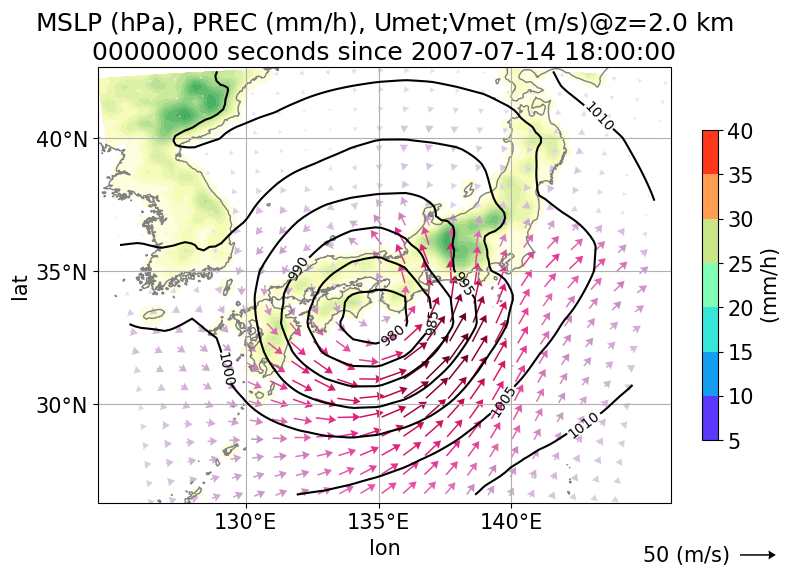

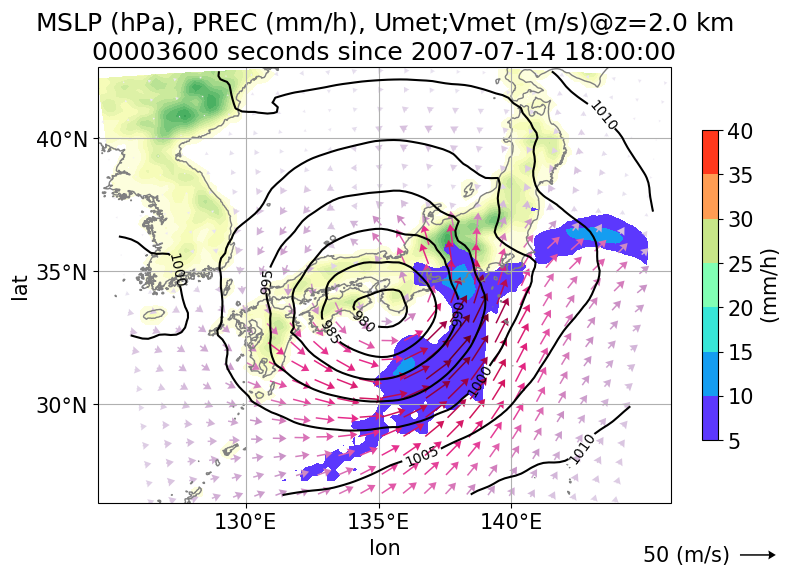

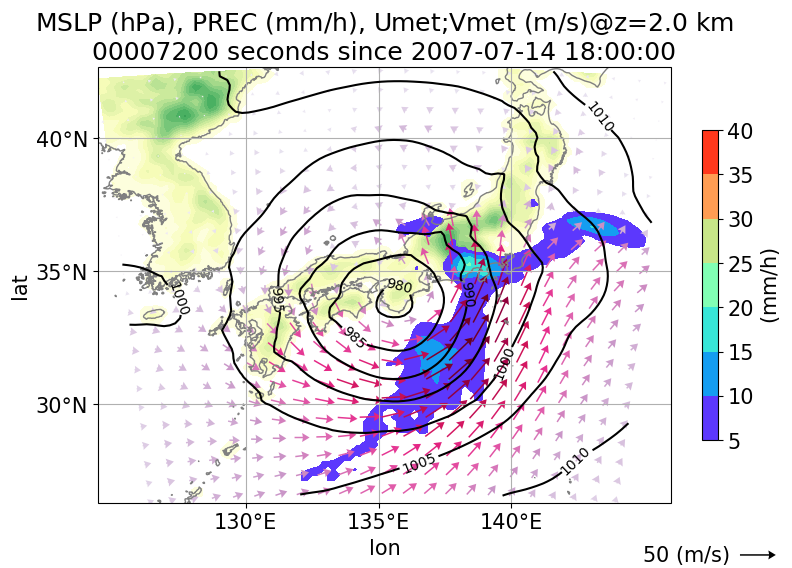

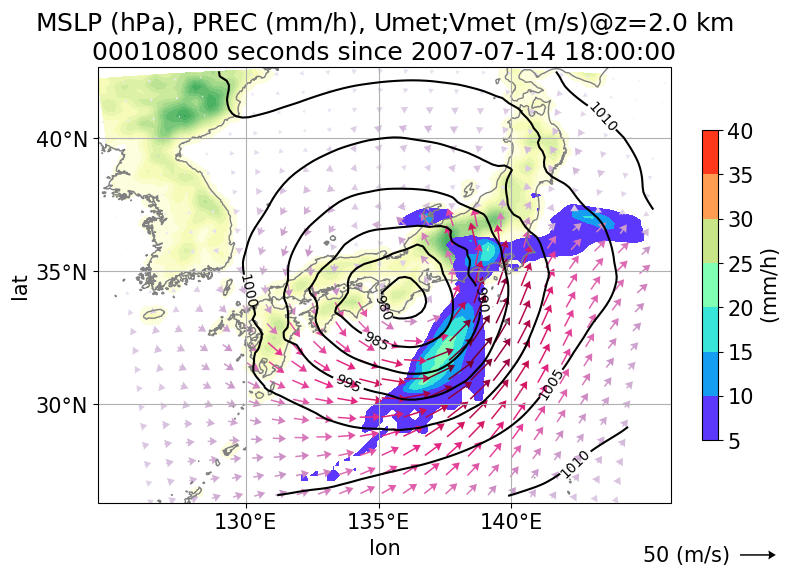

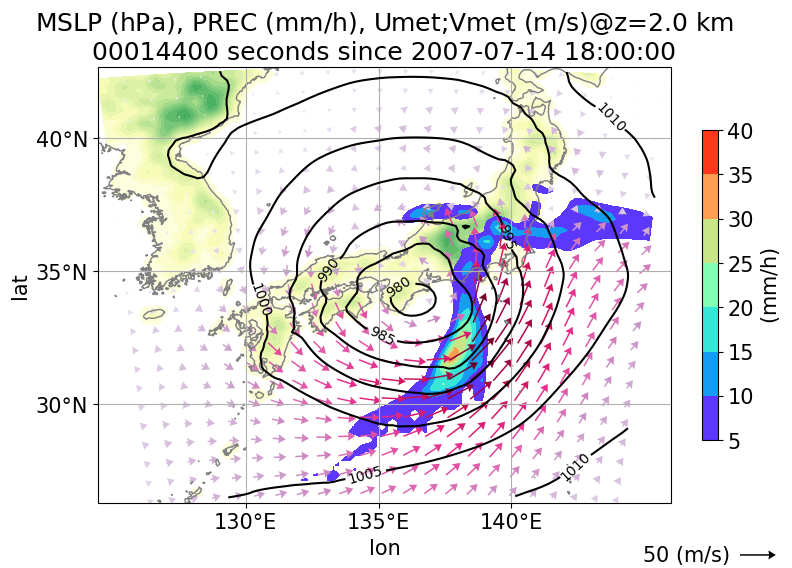

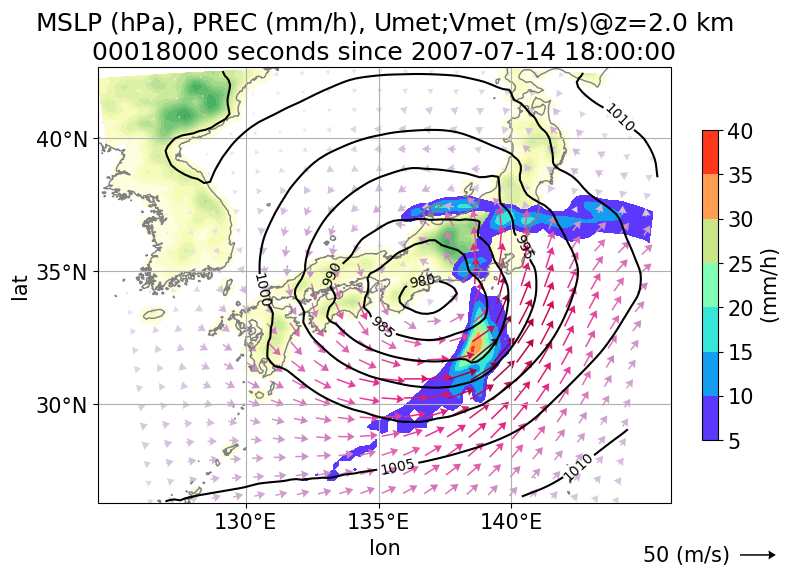

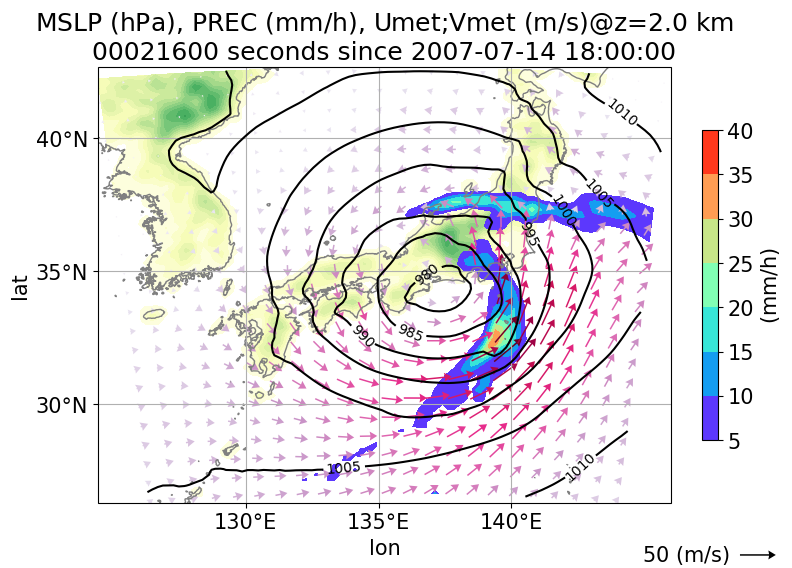

In [5]:
# Plot
for ti in range(tsize):
    print(f"ti/tsize={ti}/{tsize}")
    title = ""

    if withmap:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
        ax.coastlines('10m',color='gray')
        ax.set_xticks(xticks, crs=ccrs.PlateCarree())
        ax.set_yticks(yticks, crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter())
        ax.yaxis.set_major_formatter(LatitudeFormatter())
        ax.gridlines(xlocs=xticks, ylocs=yticks)
    else:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
        ax.set_aspect("equal")
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        ax.grid()

    if withtopo:
        cax = ax.contourf(lon,lat,topo[2:-2,2:-2],levels=topolevels,cmap=topocmap)

    if withcont:
        contvar = xrvar[contvarname]
        cs = ax.contour(lon,lat,contvar[ti,:,:]*contvarfact,levels=contvarlevels,colors=["k"])#,cmap="seismic_r") # ,colors=["k"])#
        ax.clabel(cs, inline=True, fontsize=10,fmt='%1.0f')
        #cs = ax.contour(lon,lat,varlist1[0][ti,:,:]*1e-2,levels=levels1*1e-2,colors=["k"])#,cmap="seismic_r") # ,colors=["k"])#
        #ax.clabel(cs, inline=True, fontsize=10,fmt='%1.0f')
        title = title + contvarname + " " + contvarunit + ", " # r"$\mathrm{MSLP\ (hPa)}$ & " 

    if withcontf:
        contfvar = xrvar[contfvarname]
        cax = ax.contourf(lon,lat,contfvar[ti,:,:]*contfvarfact,levels=contfvarlevels,cmap=contfvarcmap)#,extend="max")
        cbar = plt.colorbar(cax,ax=ax,fraction=0.025)
        cbar.set_label(contfvarunit)
        title = title + contfvarname + " " + contfvarunit + ", " # r"$\mathrm{PREC\ (mm/h)}$, " 

    if withvec:
        if vecvardims[0]==3:
            u = xrvar[vecvarnames[0]][ti,vecvarzi[0],:,:]
        if vecvardims[1]==3:
            v = xrvar[vecvarnames[1]][ti,vecvarzi[1],:,:]
        qu = ax.quiver(lon[::yint,::xint],lat[::yint,::xint],u[::yint,::xint],v[::yint,::xint],((u**2+v**2)**0.5)[::yint,::xint],scale=vecscale,cmap=veccmap,headwidth=6)
#        ax.quiverkey(qu, 0.92, 0.18, keylen, str(keylen) + '$\mathrm{\ }$' + vecvarunit, labelpos='W', coordinates='figure')
        ax.quiverkey(qu, 1.12, -0.12, keylen, str(keylen) + '$\mathrm{\ }$' + vecvarunit, labelpos='W', coordinates='axes')
        title = title + f"{vecvarnames[0]};{vecvarnames[1]}" + " " + vecvarunit + f"@z={float(z[vecvarzi[0]]/1000):.1f} km"  + ", "#  r"$\mathrm{Umet;Vmet|_{z=2\ km}\ (m/s)}$"  

    ax.set_xlabel("lon")
    ax.set_ylabel("lat")

    try:
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)
    except NameError:
        pass

    title = title[:-2]
    if withtimetitle:
        title = title + "\n" + f"{int(time.data[ti]):08d} {time.units}"

    ax.set_title(title)
    if savefig:
        fig.savefig(dir_out + fig_basename + f"{int(time.data[ti]):08d}" + ".png", dpi=150)
        #plt.close("all")